# **Tugas Besar Analisis Kompleksitas Algoritma**

**Anggota :**
1. Afan Ramadhan (2311110064)
2. Agung Malik Ibrahim (2311110067)

**Kelas**
<br>S1SD04-B</br>

## Initialize

In [1]:
import time
import json
import requests
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
url = "https://agungibr.github.io/stats-api/passing_stats.json"
response = requests.get(url)
passing_data = response.json()

## Calculate

In [3]:
def calculate_passing_percentage(data):
    for player in data:
        passes_completed = float(player['PassesCompleted'])
        passes_attempted = float(player['PassesAttempted'])

        if passes_attempted == 0:
            player['PassingPercentage'] = 0.0
        else:
            player['PassingPercentage'] = (passes_completed / passes_attempted) * 100
    return data

## Iterative

In [4]:
#iterative
def iterative_sort(data):
    n = len(data)
    for i in range(n):
        for j in range(0, n-i-1):
            if data[j]['PassingPercentage'] < data[j+1]['PassingPercentage']:
                data[j], data[j+1] = data[j+1], data[j]
    return data

## Recursive

In [5]:
#recursive
def recursive_sort(data):
    if len(data) > 1:
        mid = len(data) // 2
        left_half = data[:mid]
        right_half = data[mid:]

        recursive_sort(left_half)
        recursive_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i]['PassingPercentage'] > right_half[j]['PassingPercentage']:
                data[k] = left_half[i]
                i += 1
            else:
                data[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            data[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            data[k] = right_half[j]
            j += 1
            k += 1

    return data

## Main

+------+--------------------+--------------------+
|  n   | Recursive Time (s) | Iterative Time (s) |
+------+--------------------+--------------------+
|  5   |     0.0000198      |     0.0000098      |
|  50  |     0.0002720      |     0.0004668      |
| 250  |     0.0015798      |     0.0110295      |
| 500  |     0.0032861      |     0.0550621      |
| 1000 |     0.0036416      |     0.1053267      |
| 1500 |     0.0058582      |     0.2795174      |
| 2000 |     0.0113990      |     0.8334208      |
+------+--------------------+--------------------+


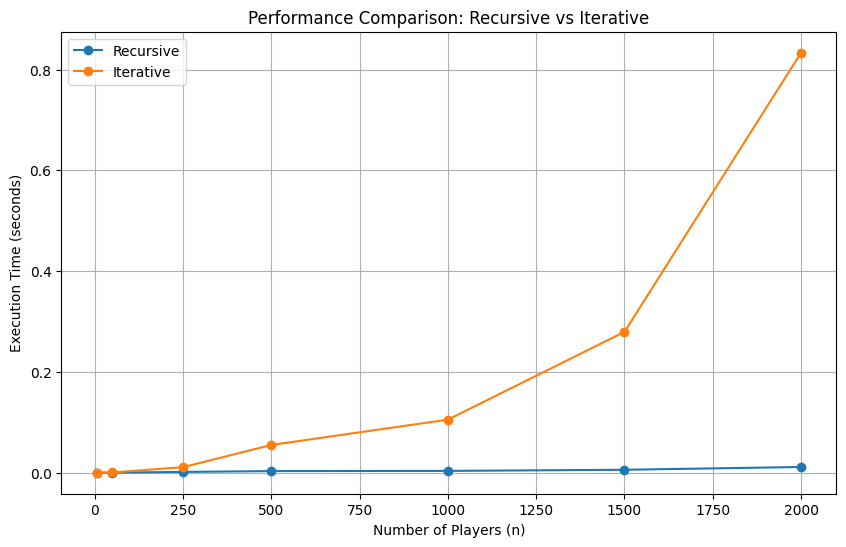

In [6]:
n_values = []
recursive_times = []
iterative_times = []

data_with_percentage = calculate_passing_percentage(passing_data)

table = PrettyTable()
table.field_names = ["n", "Recursive Time (s)", "Iterative Time (s)"]

for n in [5, 50, 250, 500, 1000, 1500, 2000]:
    test_data = data_with_percentage[:n]

    start_time = time.time()
    recursive_sort(test_data.copy())
    recursive_times.append(time.time() - start_time)

    start_time = time.time()
    iterative_sort(test_data.copy())
    iterative_times.append(time.time() - start_time)

    table.add_row([n, f"{recursive_times[-1]:.7f}", f"{iterative_times[-1]:.7f}"])

    n_values.append(n)

print(table)

def update_graph():
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, recursive_times, label='Recursive', marker='o', linestyle='-')
    plt.plot(n_values, iterative_times, label='Iterative', marker='o', linestyle='-')
    plt.title('Performance Comparison: Recursive vs Iterative')
    plt.xlabel('Number of Players (n)')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

update_graph()